<center><img src="prog_lang.jpg" width=500></center>

How can you determine which programming languages and technologies are most widely used? Which languages are gaining or losing popularity, helping you decide where to focus your efforts?

One excellent data source is Stack Overflow, a programming question-and-answer site with more than 16 million questions on programming topics. Each Stack Overflow question is tagged with a label identifying its topic or technology. By counting the number of questions related to each technology, you can estimate the popularity of different programming languages.

In this project, you will use data from the Stack Exchange Data Explorer to examine the relative popularity of R compared to other programming languages.

You'll work with a dataset containing one observation per tag per year, including the number of questions for that tag and the total number of questions that year.

`stack_overflow_data.csv`
|Column|Description|
|------|-----------|
|`year`|The year the question was asked (2008-2020)|
|`tag`|A word or phrase that describes the topic of the question, such as the programming language|
|`num_questions`|The number of questions with a certain tag in that year|
|`year_total`|The total number of questions asked in that year|

### Summary Insights

- **R in 2020:** Represented approximately 1.87% of all Stack Overflow questions.  
- **Top 5 tags (2015–2020):** python, javascript, java, c#, php.  

This analysis demonstrates which programming languages were the most popular between 2015 and 2020.


In [9]:
# Load necessary packages
library(readr)
library(dplyr)
library(ggplot2)

In [10]:
# Load the dataset
data <- read_csv("stack_overflow_data.csv")

Rows: 420066 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): tag
dbl (3): year, num_questions, year_total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
# View the dataset
head(data)

year,tag,num_questions,year_total
<dbl>,<chr>,<dbl>,<dbl>
2008,treeview,69,168541
2008,scheduled-tasks,30,168541
2008,specifications,21,168541
2008,rendering,35,168541
2008,http-post,6,168541
2008,static-assert,1,168541


In [12]:
# Start coding here
# Use as many cells as you like!
#Filter rows where tag is 'r' and year is 2020
r_2020 <- data %>%
	filter(tag == 'r', year == 2020) %>%
	mutate(percentage = (num_questions / year_total) * 100) %>%
	select(year, tag, num_questions, year_total, percentage)

#display result
r_2020

year,tag,num_questions,year_total,percentage
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2020,r,52662,5452545,0.9658242


In [13]:
#filter for years 2015-2020
highest_tags <- data %>%
	filter(year >= 2015, year <= 2020) %>%
	group_by(tag) %>%
	summarize(total_questions = sum(num_questions, na.rm = TRUE)) %>%
	arrange(desc(total_questions)) %>%
	slice_head(n=5)

#Show top five
highest_tags

tag,total_questions
<chr>,<dbl>
javascript,1373634
python,1187838
java,982747
android,737330
c#,730045


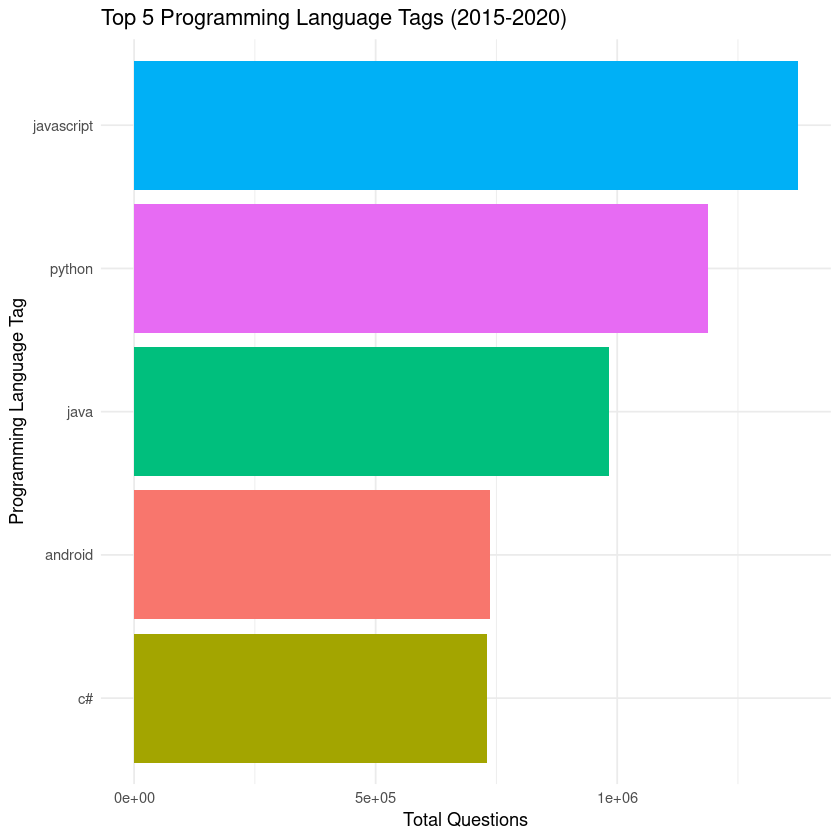

In [14]:
#Visualization (Bar Chart) For Top 5 Programming Langauges
ggplot(highest_tags, aes(x= reorder(tag, total_questions), y = total_questions, fill = tag)) + 
	geom_col(show.legend = FALSE) +
	coord_flip() + 
	labs(
		title = "Top 5 Programming Language Tags (2015-2020)",
		x = "Programming Language Tag",
		y = "Total Questions"
	) +
	theme_minimal()